In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib import cm, pyplot as plt
from hmmlearn.hmm import GaussianHMM

In [67]:
df = pd.read_csv('../HMM_randomportfolio.csv')
df.pricingdate = df.pricingdate.astype('datetime64')
df = df.tail(1000)
df = df.set_index(df.pricingdate).drop('pricingdate', axis=1)
df

,priceclose,r1,signal
pricingdate,,,
2018-06-12,1293.170013,0.002628,1
2018-06-13,1296.170003,0.002320,1
2018-06-14,1303.909986,0.005971,1
2018-06-15,1308.450022,0.003482,1
2018-06-18,1299.859995,-0.006565,0
...,...,...,...
2022-05-24,1871.590002,0.002630,1
2022-05-25,1913.690022,0.022494,1
2022-05-26,1923.819968,0.005293,1


In [96]:
model = GaussianHMM(n_components=2)

In [97]:
model.fit(np.array(df.r1).reshape(-1,1))

GaussianHMM(n_components=2)

In [98]:
df['hidden'] = model.predict(np.array(df.r1).reshape(-1,1))

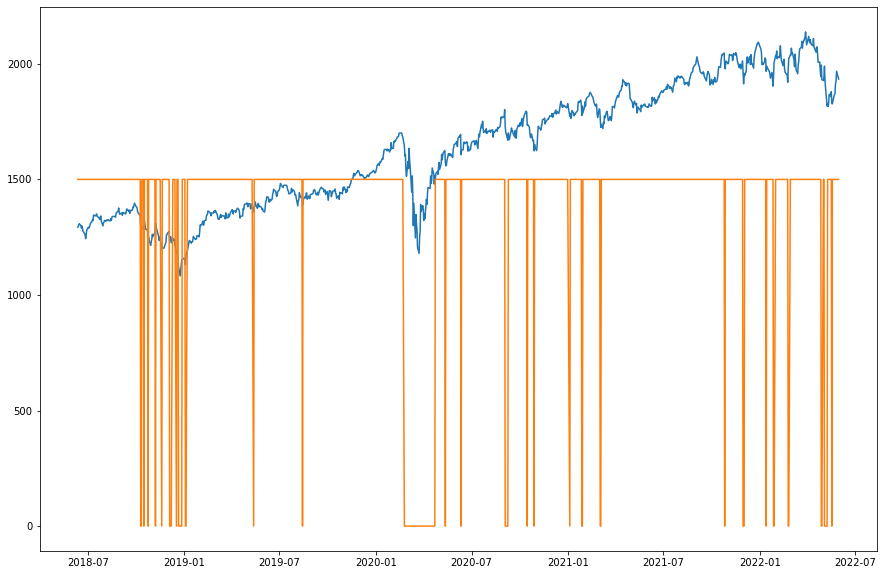

In [101]:
plt.figure(figsize=(15,10))
plt.plot(df.priceclose)
plt.plot(df.hidden*1500)

In [100]:
pd.Series(df.reset_index().hidden).value_counts()

1    912
0     88
Name: hidden, dtype: int64